In [1]:
import glob


folders = ['original', 'old', 'sad', 'smile', 'angry', 'curly']
images = {}

for folder in folders:
    images[folder] = sorted(glob.glob(f'{folder}/*.jpg'))

for k, v in images.items():
    print(k, len(v))



original 199
old 199
sad 189
smile 199
angry 199
curly 199


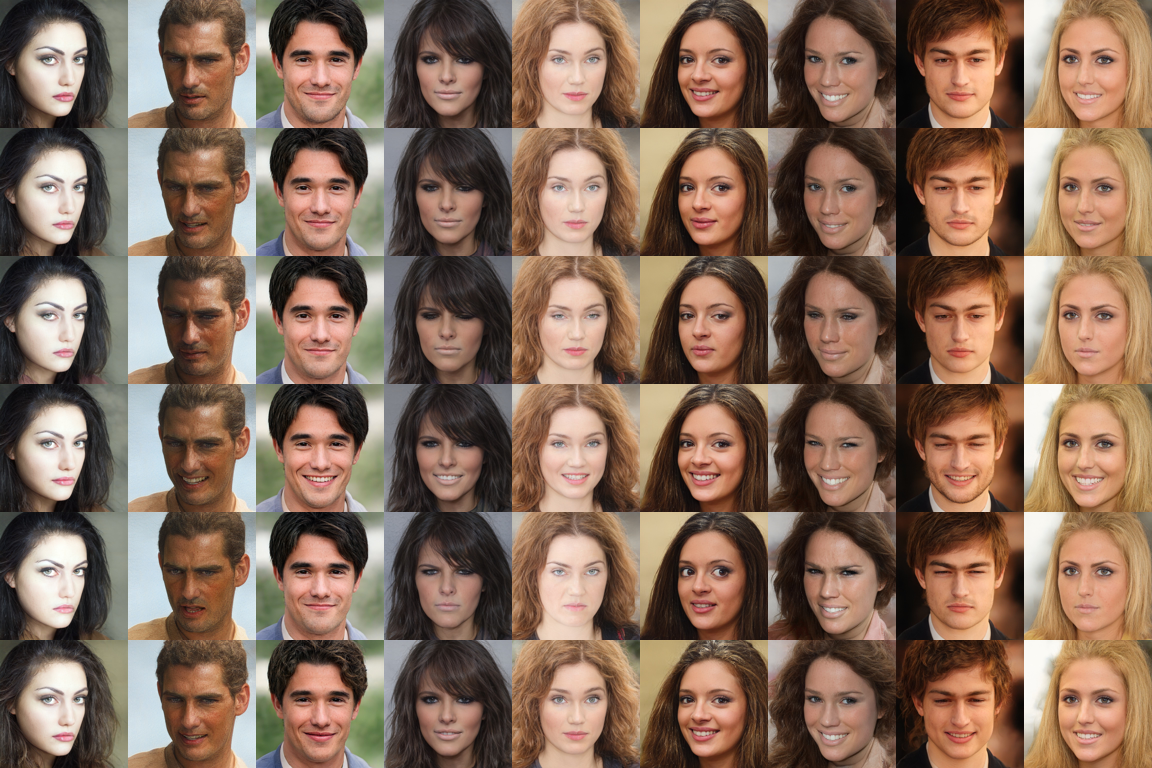

[180, 181, 182, 183, 184, 185, 186, 187, 188]
['original', 'old', 'sad', 'smile', 'angry', 'curly']


In [26]:
# concatenate several images into one
from PIL import Image


def concat_in_column(image_paths):
    images = [Image.open(img) for img in image_paths]

    # resize all images to 128 * 128
    images = [i.resize((128, 128)) for i in images]

    widths, heights = zip(*(i.size for i in images))

    max_width = max(widths)
    total_height = sum(heights)
    
    new_image = Image.new('RGB', (max_width, total_height))
    
    y_offset = 0
    for image in images:
        new_image.paste(image, (0, y_offset))
        y_offset += image.height
    
    # show the image
    # new_image.show()
    return new_image


def concat_in_row(images):
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_image = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for image in images:
        new_image.paste(image, (x_offset, 0))
        x_offset += image.width
    
    return new_image


new_images = []
image_ids = []
for i in range(180, 190):
    img_to_concat = []
    for k in folders:
        img_path = f'{k}/{str(i).zfill(5)}.jpg'
        if img_path in images[k]:
            img_to_concat.append(img_path)

    if len(img_to_concat) == 6:
        new_img = concat_in_column(img_to_concat)
        new_images.append(new_img)
        image_ids.append(i)

new_image = concat_in_row(new_images)

new_image.show()
print(image_ids)
print(folders)

# show image with xticks and yticks
# import matplotlib.pyplot as plt

# plt.imshow(new_image)
# plt.xticks(image_ids)
# plt.yticks(folders)
# plt.show()


[4, 8, 21, 34, 37, 39, 46, 60, 61, 70]


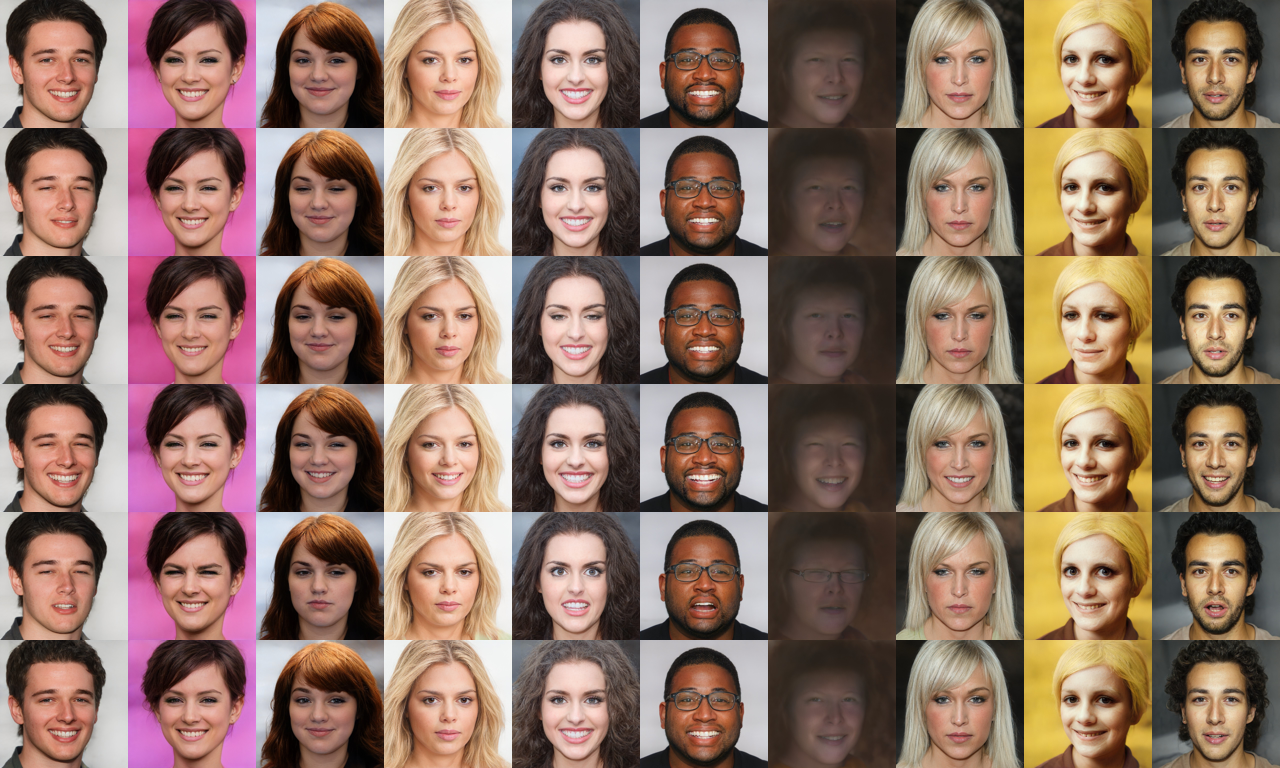

[72, 78, 81, 87, 91, 92, 97, 98, 101, 102]


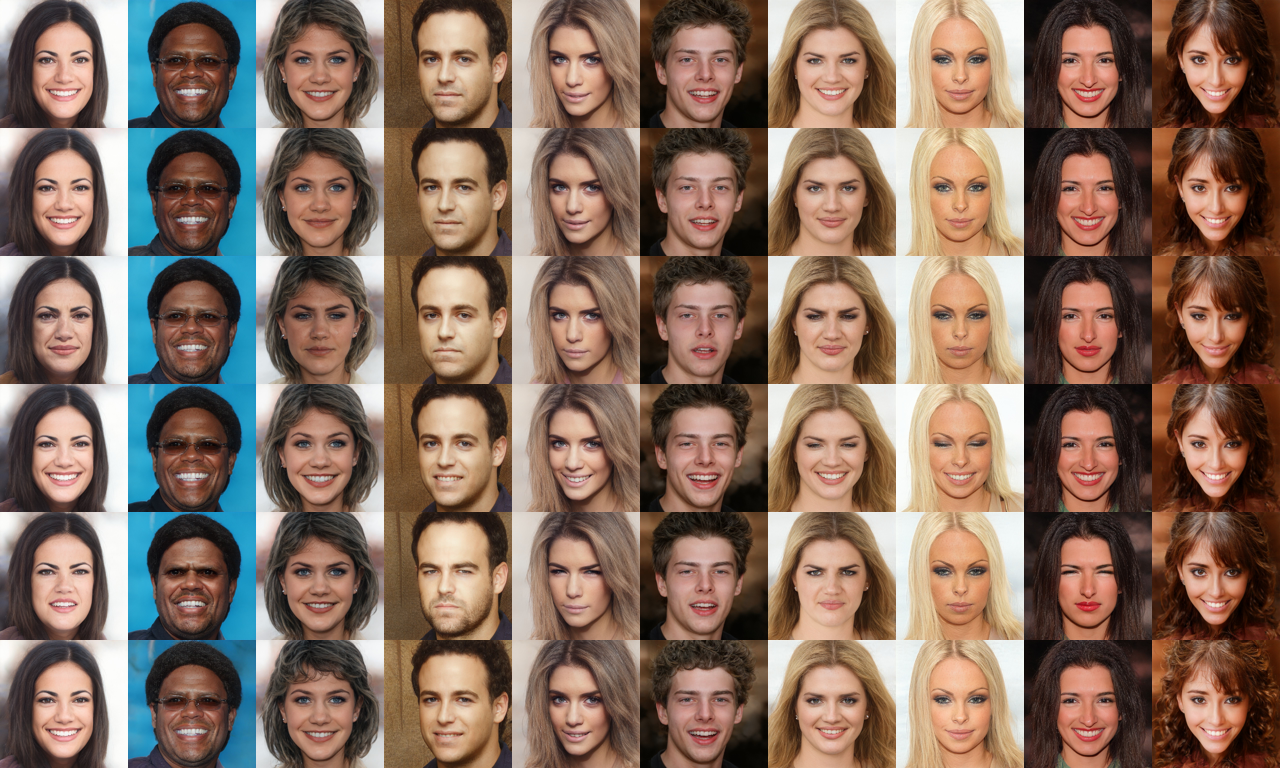

[103, 105, 107, 109, 117, 102, 133, 134, 157, 182]


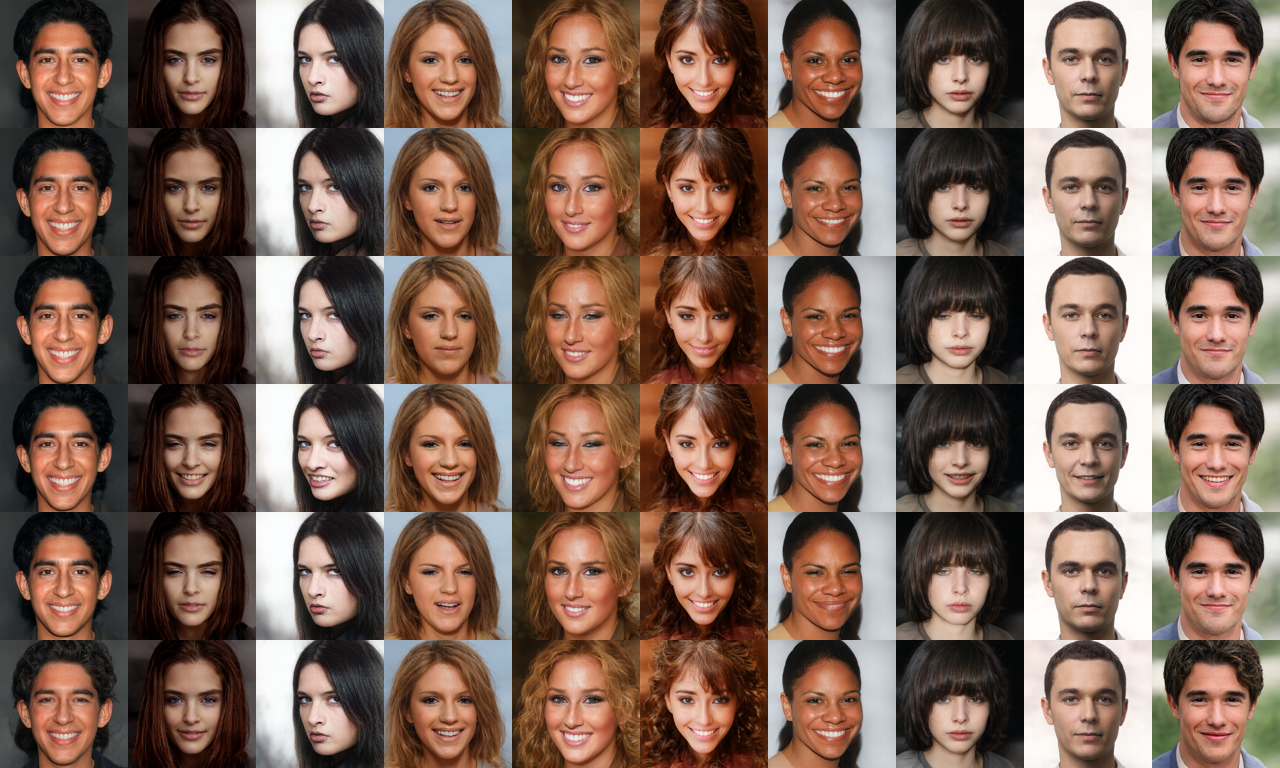

ValueError: not enough values to unpack (expected 2, got 0)

In [34]:
bad_cases =[4, 8, 21, 34, 37, 39, 46, 60, 61, 70, 72, 78, 81, 87, 91, 92, 97, 98, 101, 102, 103, 105, 107, 109, 117, 102, 133, 134, 157, 182]

for i in range(int(len(bad_cases) / 10) + 1):
    img_ids = bad_cases[i * 10: (i + 1) * 10]
    img_list = []

    for img_id in img_ids:
        img_to_concat = []
        for k in folders:
            img_path = f'{k}/{str(img_id).zfill(5)}.jpg'
            if img_path in images[k]:
                img_to_concat.append(img_path)
    
            img = concat_in_column(img_to_concat)
        img_list.append(img)
    
    img = concat_in_row(img_list)
    print(img_ids)
    img.show()

